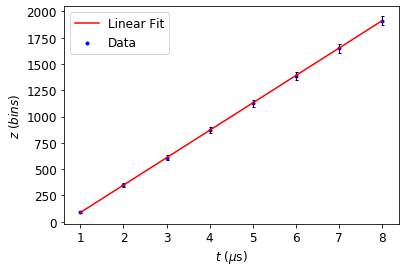

                Figure 1: Time Calibration.

Fit parameters for Figure 1:

    m = 260.3723823644043 ± 3.7755476041951264

    b = -172.42582126479962 ± 10.983906387794573

    Chi squared = 0.000804993153845837

    Reduced chi squared = 0.00013416552564097283




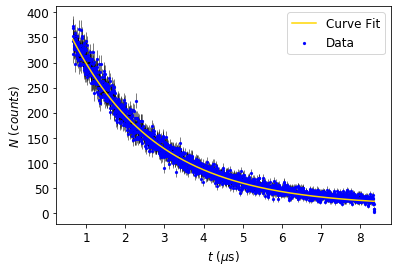

                Figure 2: The Muon Decay.

Fit parameters for Figure 2:

    N(0) = 450.1448546503396 ± 2.411166820037609

    Muon Lifetime τ = 2.195065281727325 ± 0.015977639478849056

    Constant N(noise) = 13.156417518046858 ± 0.46215646007444466

    Chi squared = 2661.4904969369295

    Reduced chi squared = 1.3307452484684648




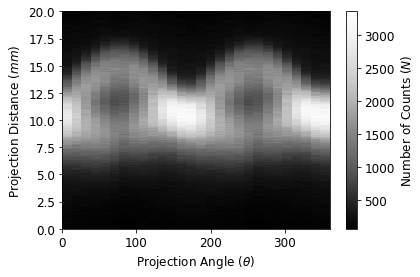

                  Figure 3: Sinogram.




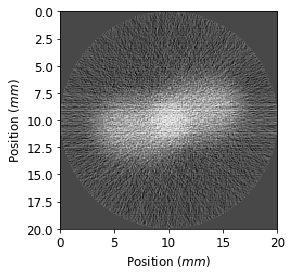

       Figure 4: Reconstructed Image.




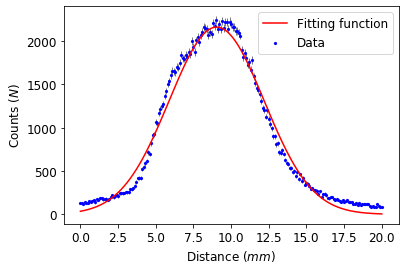

         Figure 5: Fitting Function at 138.6 Degree.

Mean(Data) = 9.026316679061592

Sigma(Data) = 3.3292343963580566

Fit parameters for Figure 5:

    a = 2160.9917558449097 ± 6.712973618026323

    Mean = 9.03920634838442 ± 0.007727687510882208

    Sigma = 3.1539558855767895 ± 0.006266535852413628

    Chi squared = 5017.0805434211625

    Reduced chi squared = 25.338790623339204


In [40]:
# My Experiments - Kreshna Sugriat - May 2020

from __future__ import division

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale, iradon

import scipy
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

from sklearn.metrics import r2_score

#_K_################################################# Muon Lifetime ####################################################_S_#

plt.rcParams.update({'font.size': 12})

print("")
print("")


def f(t, m, b):
    return m*t + b


t = np.array([1, 2, 3, 4, 5, 6, 7, 8])
z = np.array([88, 348, 609, 869, 1129, 1390, 1650, 1911] )
#z_error = np.array([1, 1, 1, 1, 1, 1, 1, 1])
z_error = np.sqrt(z)

params = curve_fit(f, t, z, sigma=z_error, absolute_sigma=True)


[m, b] = params[0]
m_error = np.sqrt(params[1][0][0])
b_error = np.sqrt(params[1][1][1])


plt.plot(t, f(t, m, b), color='r', label='Linear Fit', zorder=3)
plt.scatter(t, z, color='b', label='Data', marker=".", zorder=2)
plt.errorbar(t, z, yerr=z_error, color ='black', linestyle="None", capsize=1.5, elinewidth=1, zorder=1) 
plt.xlabel("$t$ ($\mu$s)")
plt.ylabel("$z$ ($bins$)")
plt.legend()
plt.savefig('time_calibrate_1.png', format='png', dpi=300)  


plt.show()


print("                Figure 1: Time Calibration.")
print('')
print("Fit parameters for Figure 1:")
print('')
print("    m =", m, '±', m_error)
print('')
print("    b =", b, '±', b_error)

chi_1 = sum(((z - f(t, m, b))**2/z_error**2))
rchi_1 = chi_1/(8-2)

print('')
print("    Chi squared =", chi_1)
print('')
print("    Reduced chi squared =", rchi_1)


print("")
print("")
data = np.arange(2003)   
x = (data - b)*(1/m)
y = np.loadtxt("Muon_Data/Feb_10.csv", delimiter=",", skiprows=1)
y_error = np.sqrt(y)


def g(x, N0, tau, const):
    return N0*np.exp(-x/tau) + const


params = curve_fit(g, x, y, sigma=np.sqrt(y), absolute_sigma=True)
[N0, tau, const] = params[0]
N0_error = np.sqrt(params[1][0][0])
tau_error = np.sqrt(params[1][1][1])
const_error = np.sqrt(params[1][2][2])


plt.plot(x, g(x, N0, tau, const), color='gold', label='Curve Fit', zorder=3)
plt.errorbar(x, y, yerr=y_error, linewidth=0.5, linestyle="None", color='black', zorder=1) 
plt.scatter(x, y, marker=".", linewidth=0.2, color="b", label='Data', zorder=2) 
plt.xlabel("$t$ ($\mu$s)")
plt.ylabel("$N$ ($counts$)")
#plt.title("Muon Decay (As of February 10, 2020)")
plt.legend()
plt.savefig('muon_decay.png', format='png', dpi=300)  


plt.show()


print("                Figure 2: The Muon Decay.")
print('')
print("Fit parameters for Figure 2:")
print('')
print("    N(0) =", N0, '±', N0_error) # Vertical axis intercept.
print('')
print("    Muon Lifetime τ =", tau, '±', tau_error) # Muon lifetime (what we want).
print('')
print("    Constant N(noise) =", const, '±', const_error) # Irrelevant particles that might flow through the detectors.
print('')

chi_2 = sum((y - g(x, N0, tau, const))**2/np.sqrt(y)**2)
rchi_2 = chi_2/(2003-3)

print("    Chi squared =", chi_2)
print('')
print("    Reduced chi squared =", rchi_2)
print('')

#_K_######################################## Positron Emission Tomography ##############################################_S_#


print("")


f1= np.loadtxt("PET_Data_1/Mar-04-20, 10_26 PM, Scan1, 0_0 Deg.dat", skiprows=1,unpack=True)
f2= np.loadtxt("PET_Data_1/Mar-05-20, 5_13 AM, Scan1, 12_6 Deg.dat", skiprows=1,unpack=True)
f3= np.loadtxt("PET_Data_1/Mar-05-20, 12_00 PM, Scan1, 25_2 Deg.dat", skiprows=1,unpack=True)
f4= np.loadtxt("PET_Data_1/Mar-05-20, 6_47 PM, Scan1, 37_8 Deg.dat", skiprows=1,unpack=True)
f5= np.loadtxt("PET_Data_1/Mar-06-20, 1_35 AM, Scan1, 50_4 Deg.dat",skiprows=1,unpack=True)
f6= np.loadtxt("PET_Data_1/Mar-06-20, 8_22 AM, Scan1, 63_0 Deg.dat",skiprows=1,unpack=True)
f7= np.loadtxt("PET_Data_1/Mar-06-20, 3_09 PM, Scan1, 75_6 Deg.dat",skiprows=1,unpack=True)
f8= np.loadtxt("PET_Data_1/Mar-07-20, 4_44 AM, Scan1, 100_8 Deg.dat",skiprows=1,unpack=True)
f9= np.loadtxt("PET_Data_1/Mar-07-20, 11_31 AM, Scan1, 113_4 Deg.dat",skiprows=1,unpack=True)
f10= np.loadtxt("PET_Data_1/Mar-07-20, 6_18 PM, Scan1, 126_0 Deg.dat",skiprows=1,unpack=True)
f11= np.loadtxt("PET_Data_1/Mar-08-20, 1_06 AM, Scan1, 138_6 Deg.dat",skiprows=1,unpack=True)
f12= np.loadtxt("PET_Data_1/Mar-08-20, 8_53 AM, Scan1, 151_2 Deg.dat",skiprows=1,unpack=True)
f13= np.loadtxt("PET_Data_1/Mar-08-20, 3_40 PM, Scan1, 163_8 Deg.dat",skiprows=1,unpack=True)
f14= np.loadtxt("PET_Data_1/Mar-08-20, 10_27 PM, Scan1, 176_4 Deg.dat",skiprows=1,unpack=True)
f15= np.loadtxt("PET_Data_1/Mar-09-20, 5_15 AM, Scan1, 180_0 Deg.dat",skiprows=1,unpack=True)


f16= np.loadtxt("PET_Data_1/Mar-05-20, 5_13 AM, Scan1, 12_6 Deg.dat", skiprows=1,unpack=True)
f17= np.loadtxt("PET_Data_1/Mar-05-20, 12_00 PM, Scan1, 25_2 Deg.dat", skiprows=1,unpack=True)
f18= np.loadtxt("PET_Data_1/Mar-05-20, 6_47 PM, Scan1, 37_8 Deg.dat", skiprows=1,unpack=True)
f19= np.loadtxt("PET_Data_1/Mar-06-20, 1_35 AM, Scan1, 50_4 Deg.dat",skiprows=1,unpack=True)
f20= np.loadtxt("PET_Data_1/Mar-06-20, 8_22 AM, Scan1, 63_0 Deg.dat",skiprows=1,unpack=True)
f21= np.loadtxt("PET_Data_1/Mar-06-20, 3_09 PM, Scan1, 75_6 Deg.dat",skiprows=1,unpack=True)
f22= np.loadtxt("PET_Data_1/Mar-07-20, 4_44 AM, Scan1, 100_8 Deg.dat",skiprows=1,unpack=True)
f23= np.loadtxt("PET_Data_1/Mar-07-20, 11_31 AM, Scan1, 113_4 Deg.dat",skiprows=1,unpack=True)
f24= np.loadtxt("PET_Data_1/Mar-07-20, 6_18 PM, Scan1, 126_0 Deg.dat",skiprows=1,unpack=True)
f25= np.loadtxt("PET_Data_1/Mar-08-20, 1_06 AM, Scan1, 138_6 Deg.dat",skiprows=1,unpack=True)
f26= np.loadtxt("PET_Data_1/Mar-08-20, 8_53 AM, Scan1, 151_2 Deg.dat",skiprows=1,unpack=True)
f27= np.loadtxt("PET_Data_1/Mar-08-20, 3_40 PM, Scan1, 163_8 Deg.dat",skiprows=1,unpack=True)
f28= np.loadtxt("PET_Data_1/Mar-08-20, 10_27 PM, Scan1, 176_4 Deg.dat",skiprows=1,unpack=True)
f29= np.loadtxt("PET_Data_1/Mar-09-20, 5_15 AM, Scan1, 180_0 Deg.dat",skiprows=1,unpack=True)


fdist = np.column_stack((f2[0,:],f3[0,:],f4[0,:],f5[0,:],f6[0,:],f7[0,:],f8[0,:],f9[0,:],f10[0,:],f11[0,:],
                         f12[0,:],f13[0,:],f14[0,:],f15[0,:],f16[0,:],f17[0,:],f18[0,:],f19[0,:],f20[0,:],
                         f21[0,:],f22[0,:],f23[0,:],f24[0,:],f25[0,:],f26[0,:],f27[0,:],f28[0,:],f29[0,:]))

fpix  = np.column_stack((f2[1,:],f3[1,:],f4[1,:],f5[1,:],f6[1,:],f7[1,:],f8[1,:],f9[1,:],f10[1,:],f11[1,:],
                         f12[1,:],f13[1,:],f14[1,:],f15[1,:],f16[1,:],f17[1,:],f18[1,:],f19[1,:],f20[1,:],
                         f21[1,:],f22[1,:],f23[1,:],f24[1,:],f25[1,:],f26[1,:],f27[1,:],f28[1,:],f29[1,:]))


y_list = fdist
x_list = np.linspace(0.,360., num = 29)
z_list = fpix


theta32 = np.linspace(0.,360.,z_list.shape[1])


plt.imshow(z_list, extent=(np.amin(x_list), np.amax(x_list),np.amin(y_list), np.amax(y_list)), aspect = 'auto', 
           cmap='Greys_r')
plt.ylabel("Projection Distance ($mm$)")
plt.xlabel("Projection Angle ($\\theta$)")
acol = plt.colorbar()
acol.set_label('Number of Counts ($N$)')
plt.savefig('Fig1_PET.png', format='png', dpi=300)


plt.show()


print("                  Figure 3: Sinogram.")


print("")
print("")
plt.imshow(iradon(z_list,theta32,circle=True).T, extent=(np.amin(0), np.amax(20),np.amin(20), 
                                                         np.amax(0)), cmap='Greys_r')
plt.xlabel("Position ($mm$)")
plt.ylabel("Position ($mm$)")
#plt.axis('off')
plt.savefig('Fig2_PET.png', format='png', dpi=300)


plt.show()


print("       Figure 4: Reconstructed Image.")


print("")
print("")


#_K_################################################### Curve Fit ######################################################_S_#


f = np.loadtxt("PET_Data_1/Mar-08-20, 1_06 AM, Scan1, 138_6 Deg.dat",skiprows=1)


x_data = f[:,0]
y_data = f[:,1]


mean_f = sum(x_data*y_data)/(sum(x_data)+sum(y_data))                       
sigma_f = np.sqrt(sum(y_data*(x_data-mean_f)**2)/(sum(x_data)+sum(y_data)))   


def gauss(x_data,a,x0,sigma):
    return a*np.exp(-(x_data - x0)**2/(2*sigma**2))


params = curve_fit(gauss,x_data,y_data,sigma=np.sqrt(y_data), absolute_sigma=True)
[a, x0, sigma] = params[0]
a_error = np.sqrt(params[1][0][0])
x0_error = np.sqrt(params[1][1][1])
sigma_error = np.sqrt(params[1][2][2])


plt.errorbar(x_data, y_data, yerr=np.sqrt(y_data), xerr=0.05, linestyle='None', linewidth=0.5, color='black', zorder=1)
plt.scatter(x_data, y_data, marker=".", linewidth=0.2, color="b", label='Data', zorder=2)
plt.plot(x_data, gauss(x_data,a,x0,sigma), color='r', label='Fitting function', zorder=3)
plt.legend()
plt.xlabel('Distance ($mm$)')
plt.ylabel('Counts ($N$)')
plt.savefig('Fig3_PET.png', format='png', dpi=300)


plt.show()


print("         Figure 5: Fitting Function at 138.6 Degree.")
print('')
print("Mean(Data) =", mean_f)
print('')
print("Sigma(Data) =", sigma_f)
print('')
print("Fit parameters for Figure 5:")
print('')
print("    a =", a, '±', a_error) 
print('')
print("    Mean =", x0, '±', x0_error) 
print('')
print("    Sigma =", sigma, '±', sigma_error) 
print('')

chi_3 = sum((y_data - gauss(x_data,a,x0,sigma))**2/np.sqrt(y_data)**2)
rchi_3 = chi_3/(201-3)

print("    Chi squared =", chi_3)
print('')
print("    Reduced chi squared =", rchi_3)


#_K_################################################# Figures Below ####################################################_S_#

In [41]:
iradon(np.trz_list,theta32,circle=True)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])